In [1]:
import numpy as np
from data6 import data,x,y
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from pyowl import OwlRegressor
from mpl_toolkits.mplot3d import Axes3D
from laplace import get_laplace, knn_laplace,extend_knn,cordinate, distance
from kMeans import kMeans, min_k_index, max_k_index
from LocalL1 import locaL1
import copy

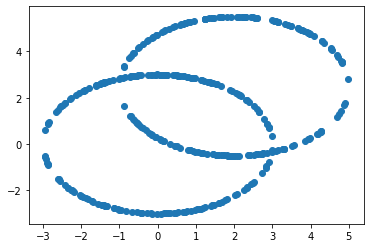

In [2]:
ax=plt.subplot(111)
ax.scatter(x,y)

In [3]:
n_sample=len(data[0])
n_feature=len(data)

In [4]:
alpha=0.0001
K=100
k1=50
k2=500

In [5]:
indexs=np.random.choice(range(n_feature),K)
B=np.zeros((n_feature,n_feature))

In [6]:
B=locaL1(data,indexs,B,alpha,k1,k2)
B=np.abs(B)

In [7]:
L=get_laplace(B)

In [8]:
u,v=np.linalg.eig(L)
v=np.real(v)
u=np.real(u)

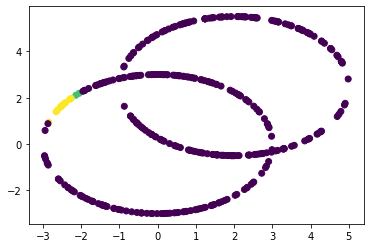

In [9]:
ax = plt.subplot(111)
ax.scatter(x,y,c=v[:,min_k_index(u,2)])

In [10]:
nonzero=[]
for index in range(200):
    nonzero.append(np.count_nonzero(B[:,index]))
nonzero_idx=[]
for i in range(200):
    if nonzero[i]!=0:
        nonzero_idx.append(i)

In [11]:
index=nonzero_idx[22]
print(index)
print(nonzero[index])
if nonzero[index]<7:
    n=nonzero[index]
else:
    n=7
idx=[]
for i in range(1,n+1):
    idx.append(max_k_index(B[:,index],i))
print(idx)

150
11
[185, 81, 147, 309, 243, 238, 319]


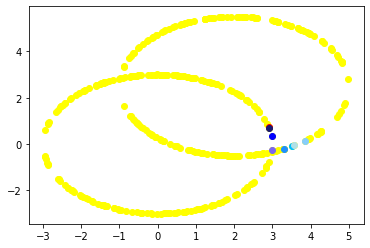

In [12]:
colour=['midnightblue','blue','mediumslateblue','dodgerblue','deepskyblue','lightskyblue','powderblue']
ax=plt.subplot(111)
ax.scatter(x,y,color='yellow')
ax.scatter(x[index],y[index],color='red')
for i in range(n):
    ax.scatter(x[idx[i]],y[idx[i]],color=colour[i])

In [13]:
# compare with KNN
W=knn_laplace(data,6)
u1,v1=np.linalg.eig(W)
u1=np.real(u1)
v1=np.real(v1)

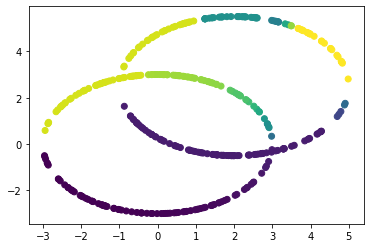

In [14]:
ax = plt.subplot(111)
ax.scatter(x,y,c=v1[:,min_k_index(u1,2)])